# <center>Monthly Internship program for Professionals

# <span style="color:red"><center>THE CODERS READY

### <span style="color:black"><center> Data Science and Business Analytics

### NAME- TUSHAR JAGTAP

### Trainee Intern at CODERS READY

## <span style="color:purple"><center>Task 1:Exploratory Data Analysis  Terrorism 

(Level Intermediate)

##  <span style="color:Green"><center>Objective

As a security/defense analyst,find out the hot zone of terrorism and derive some security issues and insights by EDA.

### TABLE OF CONTENTS:


#### 1) What this data set is all about?
#### 2) Installation of libraries and dataset
#### 3) Cleaning of dataset
#### 4) Number of terrorist activities vs Year
#### 5) Hot zones of terrorism by country
#### 6) Hot zones of terrorism in map
#### 7) Main regions of attacks
#### 8) Attacks vs Killed
#### 9) Activity of Top Terrorist Groups
#### 10) Hot zones of terrorism by city
#### 11) Success rate
#### 12) Most weapon used in attacks
#### 13) Types of attacks 
#### 14) Summary
####  15) Motive behind activities related to terrorism
#### 16) Conclusion

### 1. What this data set is all about?


 This dataset is consist of terrorist attacks around the world from 1970 to 2017.

Hotzones where most attack happens 

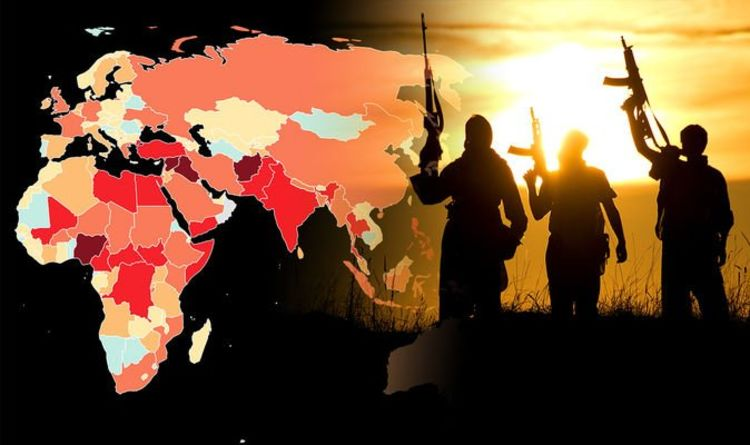

### 2) Installation of libraries and dataset

In [1]:
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud,STOPWORDS
import re
from PIL import Image
from IPython.display import display

In [2]:
 df=pd.read_excel('globalterrorism.xlsx')

### 3) Cleaning of dataset

In [3]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'Attack Type','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target type','weaptype1_txt':'Weapon type','motive':'Motive'},inplace=True)
df=df[['Year','Month','Day','Country','Region','city','latitude','longitude','Attack Type','Killed','Wounded','Target','Summary','success','Group','Target type','Weapon type','Motive']]

In [4]:
df.head(5)

,Year,Month,Day,Country,Region,city,latitude,longitude,Attack Type,Killed,Wounded,Target,Summary,success,Group,Target type,Weapon type,Motive
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,1,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,1,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,1,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,1,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,1,Unknown,Government (Diplomatic),Incendiary,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Region       181691 non-null  object 
 5   city         181257 non-null  object 
 6   latitude     177135 non-null  float64
 7   longitude    177134 non-null  float64
 8   Attack Type  181691 non-null  object 
 9   Killed       171378 non-null  float64
 10  Wounded      165380 non-null  float64
 11  Target       181055 non-null  object 
 12  Summary      115562 non-null  object 
 13  success      181691 non-null  int64  
 14  Group        181691 non-null  object 
 15  Target type  181691 non-null  object 
 16  Weapon type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(4),

### 4) Number of terrorist activities vs Year

[(2014, 16903), (2015, 14965), (2016, 13587), (2013, 12036), (2017, 10900)]


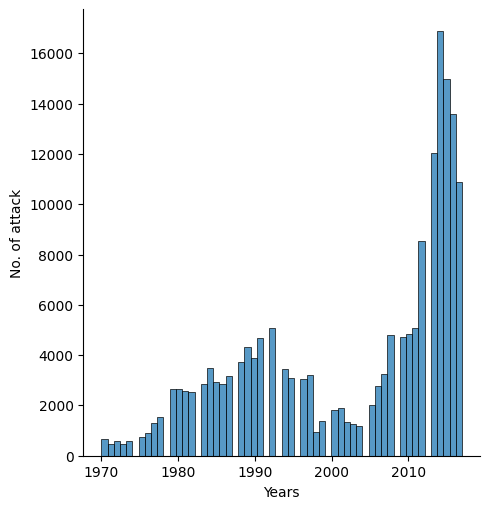

In [6]:
yer=list(df['Year'])
datam = Counter(yer)
print(datam.most_common()[:5])
sns.displot(yer,height=5)
plt.xlabel('Years')
plt.ylabel('No. of attack')
plt.show()

### 5) Hot zones of terrorism by country

[('Iraq', 24636), ('Pakistan', 14368), ('Afghanistan', 12731), ('India', 11960), ('Colombia', 8306)]


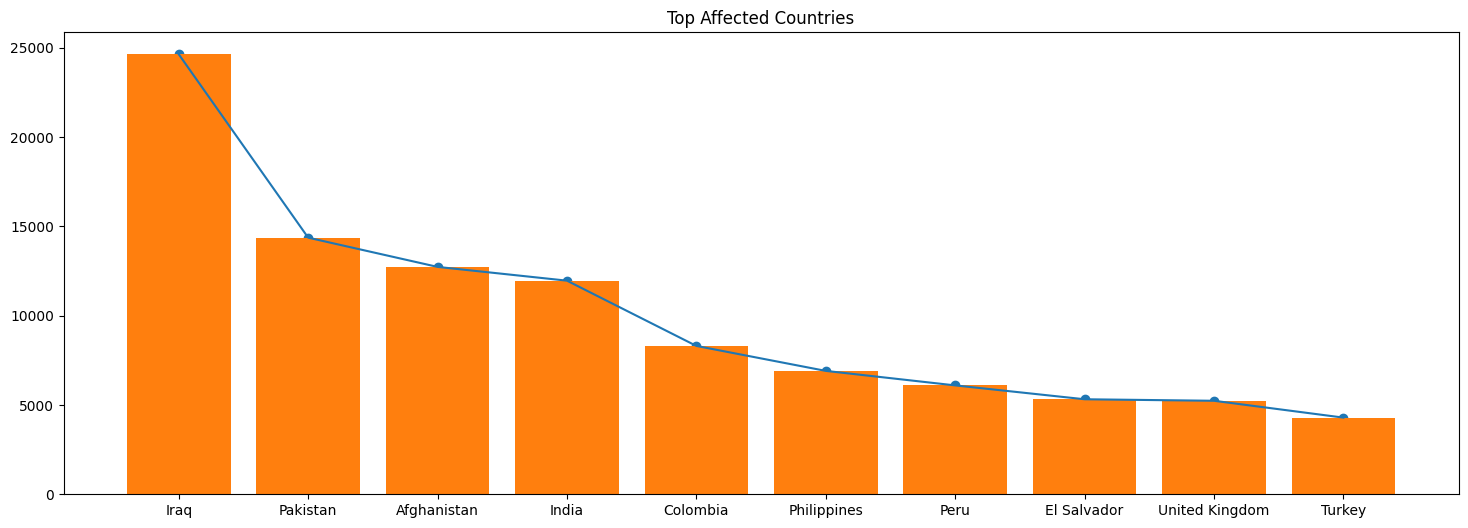

In [7]:
cont=list(df['Country'])
sn=[]
da = Counter(cont)
s=list(da.most_common()[:5])
print(s)
plt.subplots(figsize=(18,6))
plt.plot(df['Country'].value_counts()[:10].index,df['Country'].value_counts()[:10].values)
plt.scatter(df['Country'].value_counts()[:10].index,df['Country'].value_counts()[:10].values)
plt.bar(df['Country'].value_counts()[:10].index,df['Country'].value_counts()[:10].values)
plt.title('Top Affected Countries')
plt.show()

### 6) Hot zones of terrorism in map

In [8]:
lat_lng_data = pd.DataFrame(df, columns=['latitude', 'longitude'])
clean_data = lat_lng_data.dropna(axis=0, how='any')

clean_li = df['latitude']
clean_l = df['longitude']
lats = clean_li.tolist()
lons = clean_l.tolist()

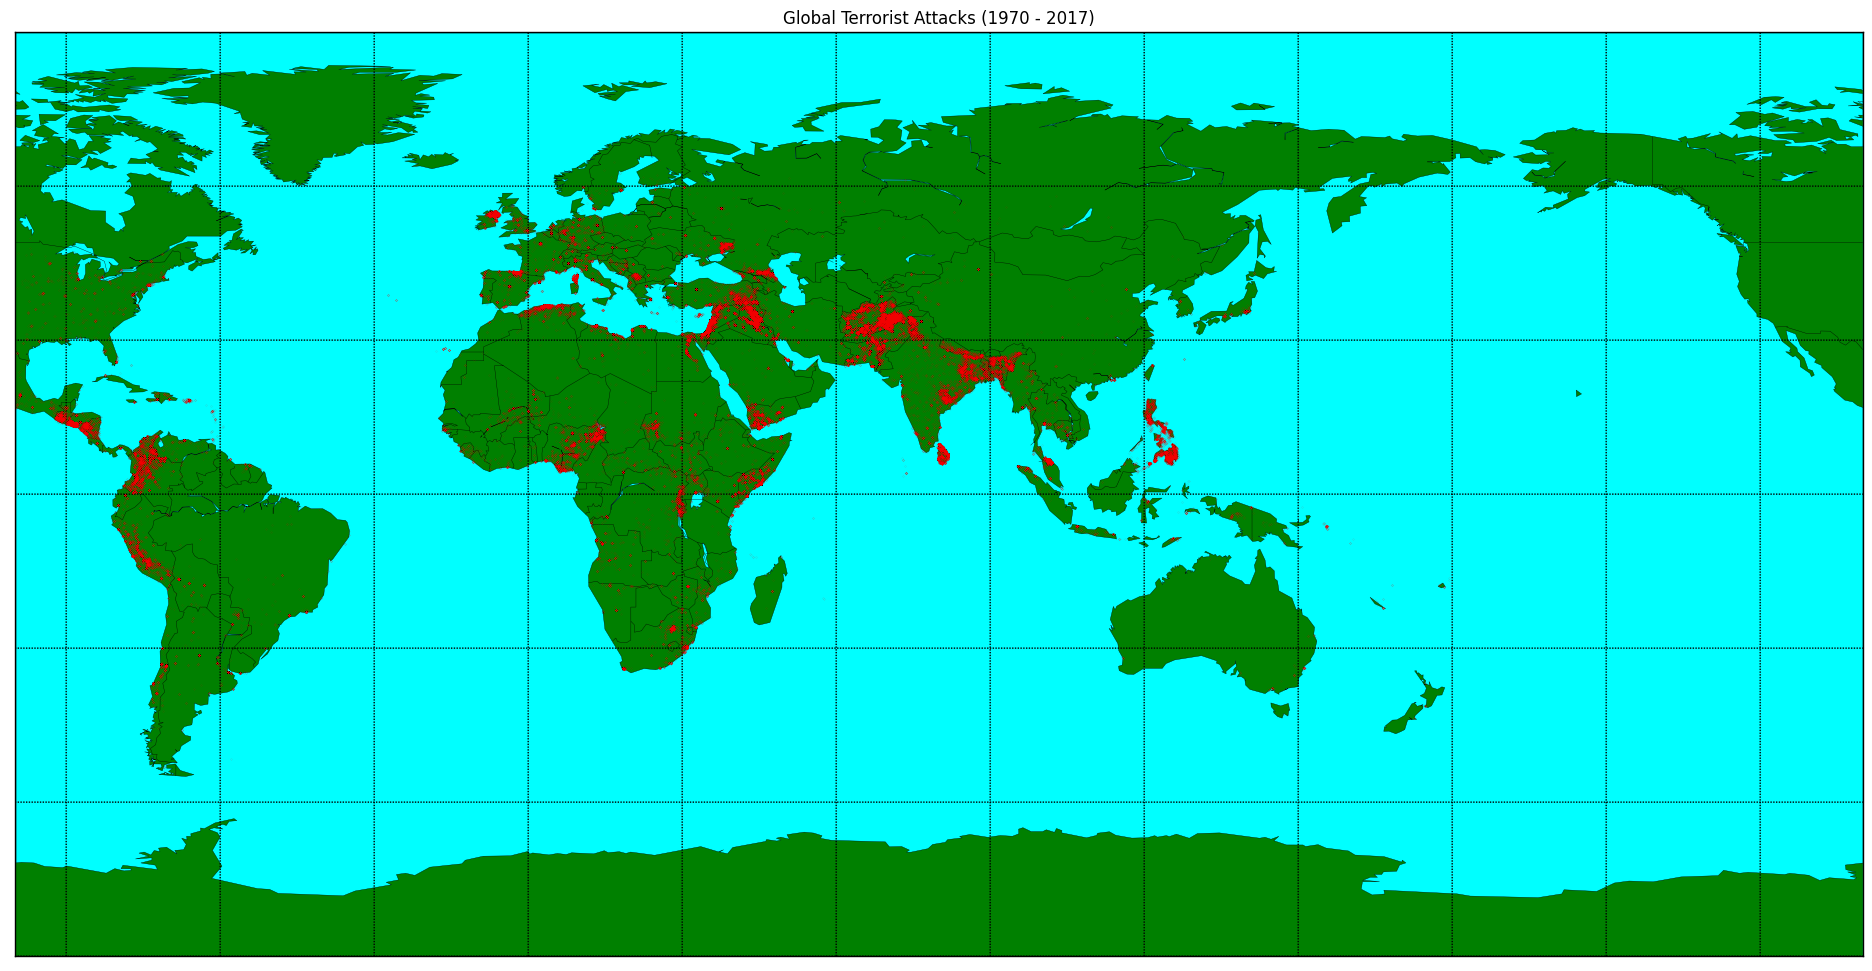

In [9]:
plt.figure(figsize=(24,12))
map = Basemap(projection='cyl',lon_0=80,resolution='c')
 
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='green',lake_color='aqua')

map.drawmapboundary(fill_color='aqua')

# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))

x,y = map(lons, lats)
map.plot(x, y, 'ro', markersize=.05)

plt.title("Global Terrorist Attacks (1970 - 2017)")
plt.show()

### 7) Main regions of attacks

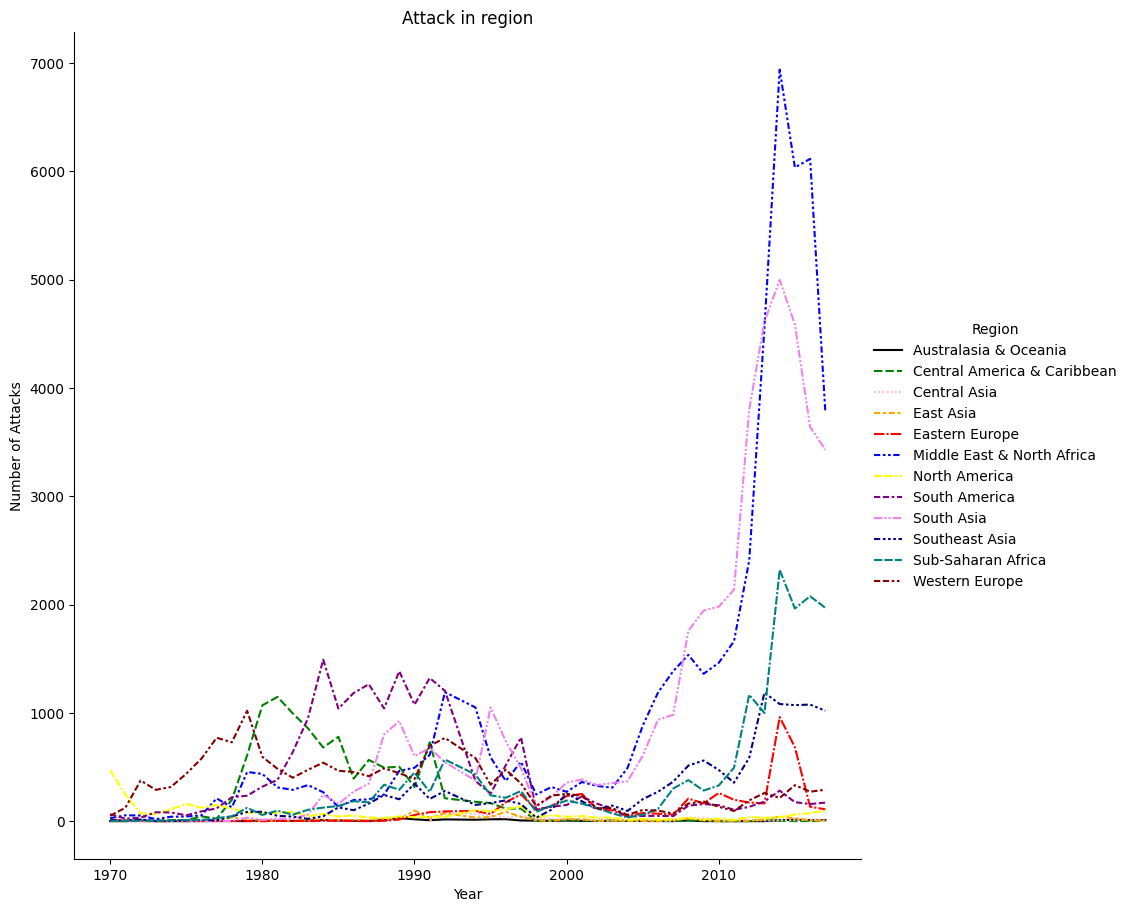

In [10]:
def attacks_region(data):
    d = data.groupby(['Region','Year'])['Year'].count()
    d = pd.DataFrame(d)
    d.reset_index(level=0,inplace=True)
    d.columns = ['Region','Number of Attacks']
    d.reset_index(level=0,inplace=True)
    sns.relplot(data=d, x="Year", y="Number of Attacks",hue="Region", style="Region",palette=["black","green","pink","orange","red","blue","yellow","purple","violet","navy","teal","maroon"],height=9, kind="line")
    plt.title('Attack in region')
    
attacks_region(df)

### 8) Attacks vs Killed

In [11]:
df["Killed"]=df["Killed"].fillna(0)
df["Wounded"]=df["Wounded"].fillna(0)
df["Casualty"]=df["Killed"]+df["Wounded"]

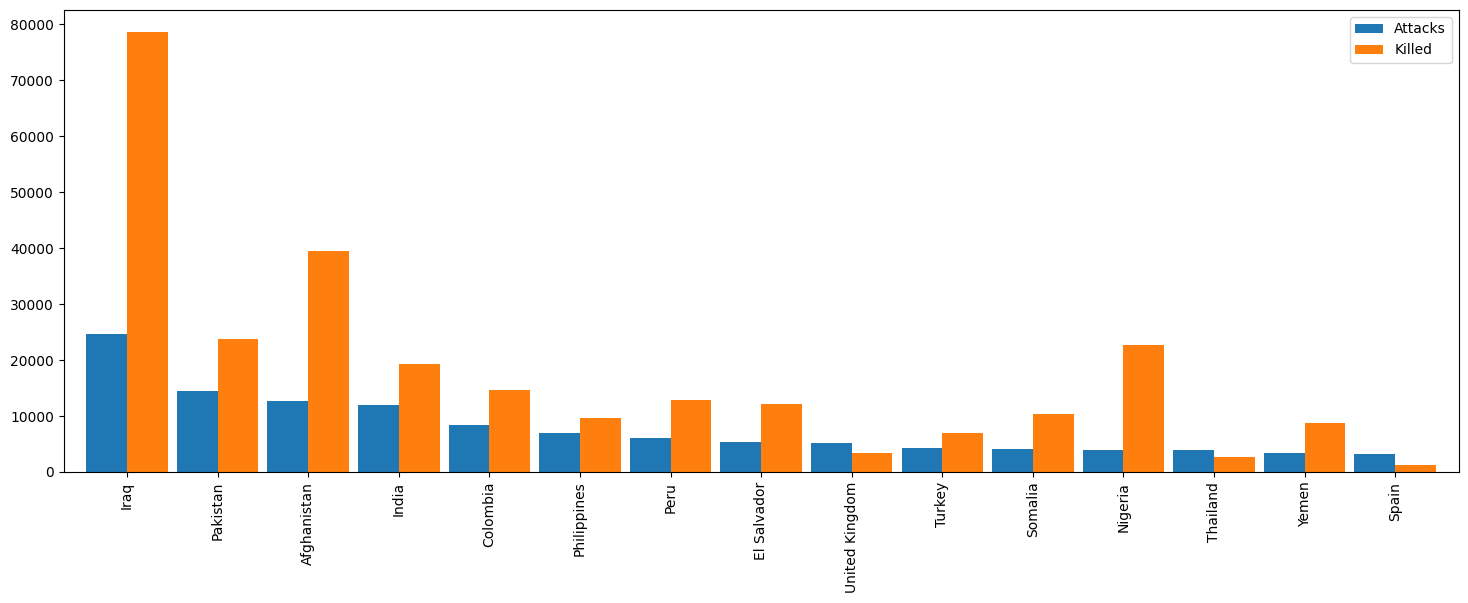

In [12]:
coun_terror=df['Country'].value_counts()[:15].to_frame()
coun_terror.columns=['Attacks']
coun_kill=df.groupby('Country')['Killed'].sum().to_frame()
coun_terror.merge(coun_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

### 9) Activity of Top Terrorist Groups

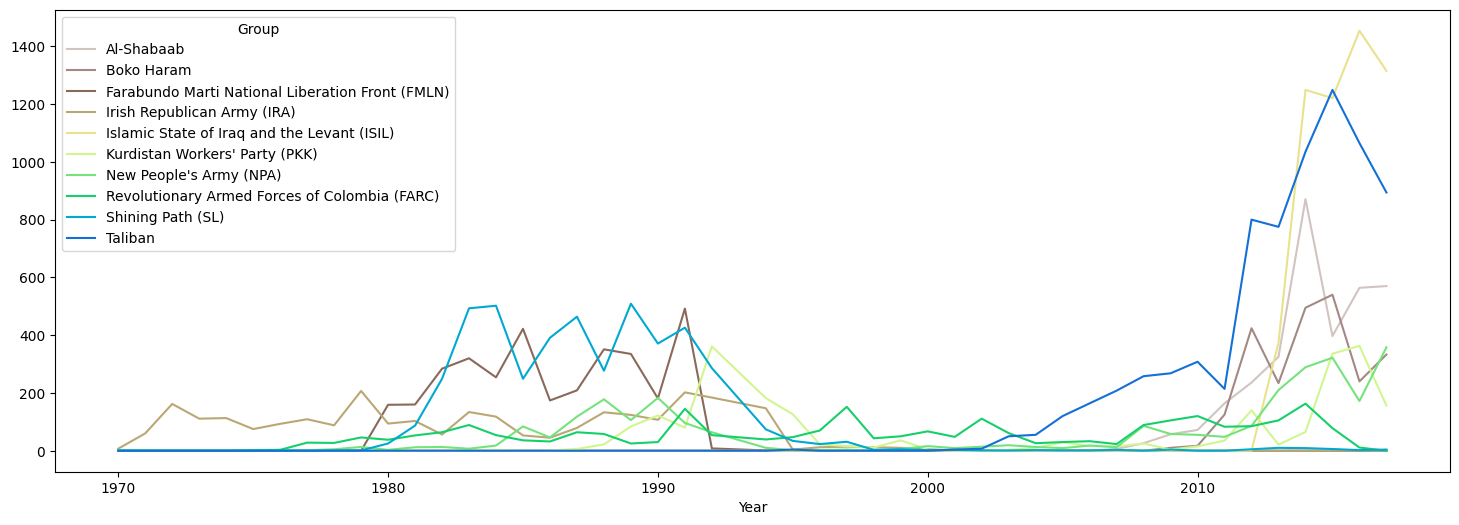

In [13]:
top_groups10=df[df['Group'].isin(df['Group'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.Year,top_groups10.Group).plot(color=sns.color_palette('terrain_r',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

### 10) Hot zones of terrorism by city

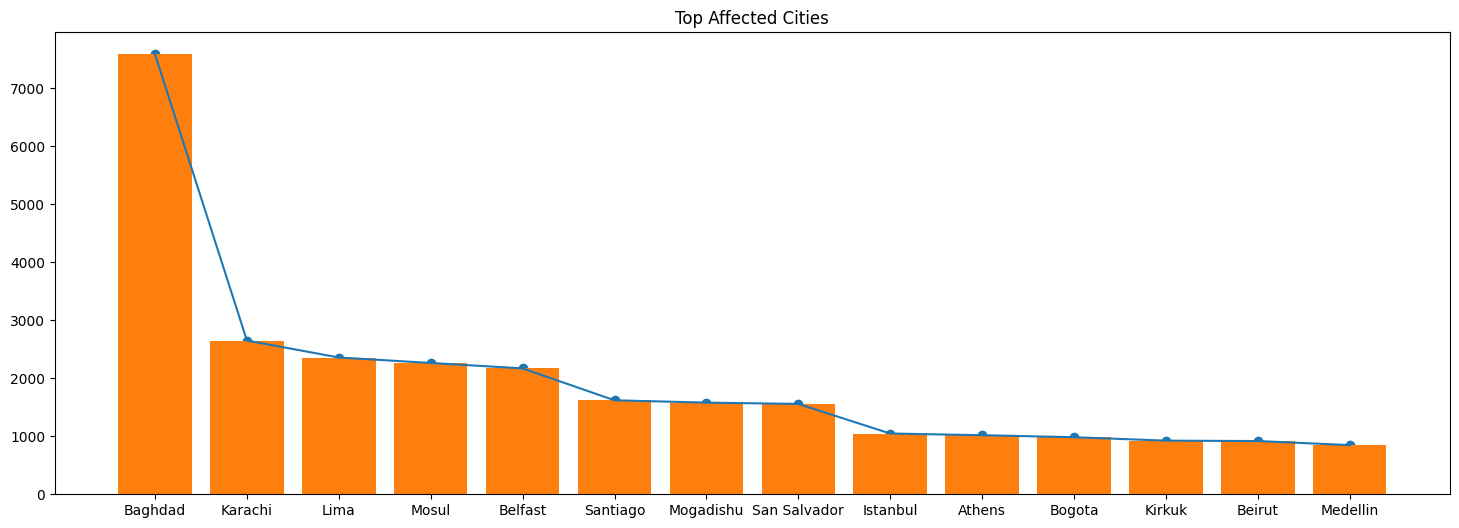

In [14]:
plt.subplots(figsize=(18,6))
plt.scatter(df['city'].value_counts()[1:15].index,df['city'].value_counts()[1:15].values)
plt.plot(df['city'].value_counts()[1:15].index,df['city'].value_counts()[1:15].values)
plt.bar(df['city'].value_counts()[1:15].index,df['city'].value_counts()[1:15].values)
plt.title('Top Affected Cities')
plt.show()

### 11) Success rate

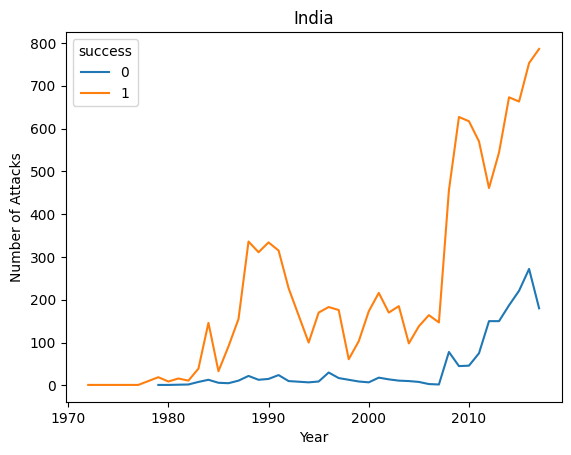

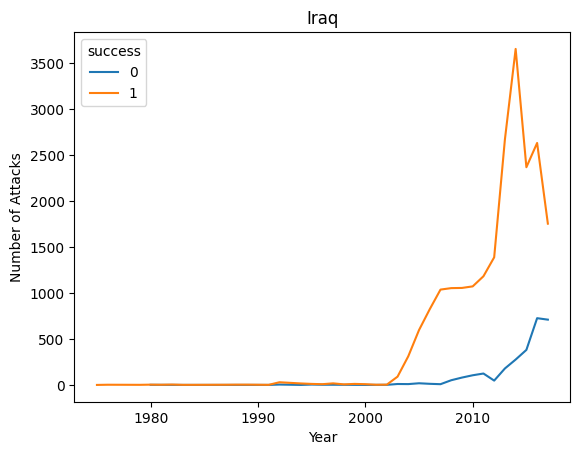

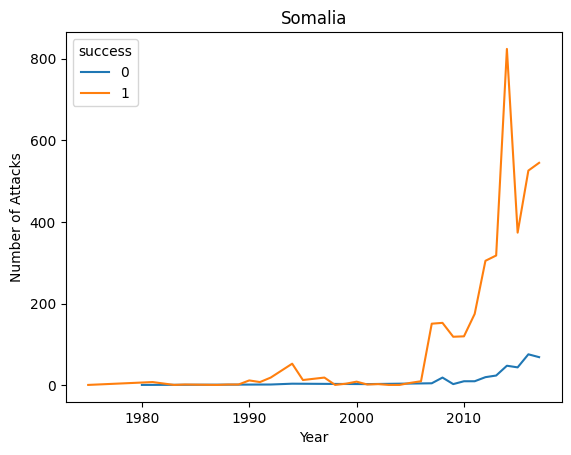

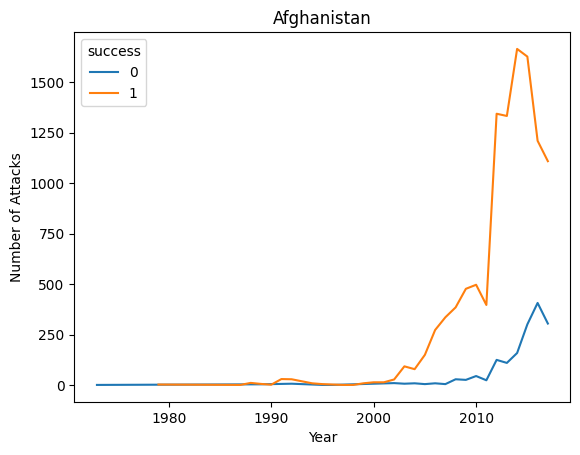

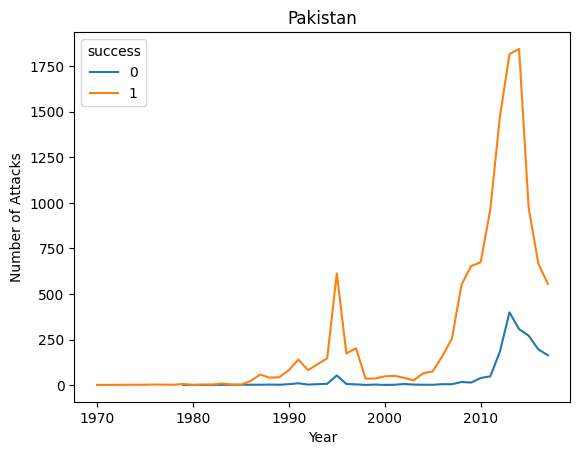

In [15]:
def succ_fail(data,country):
    s = data[data['Country']==country]
    s2 = pd.DataFrame(s.groupby(['Year','success'])['Year'].count())
    s2.columns=['count']
    s2.reset_index(inplace=True)
    p=sns.lineplot(data=s2, x="Year", y="count", hue="success")
    plt.title(country)
    plt.ylabel("Number of Attacks")
    plt.xlabel("Year")
    plt.show()

plot_countries =['India','Iraq','Somalia','Afghanistan','Pakistan']
for i in plot_countries:
    succ_fail(df,i)

### 12) Most weapon used in attacks

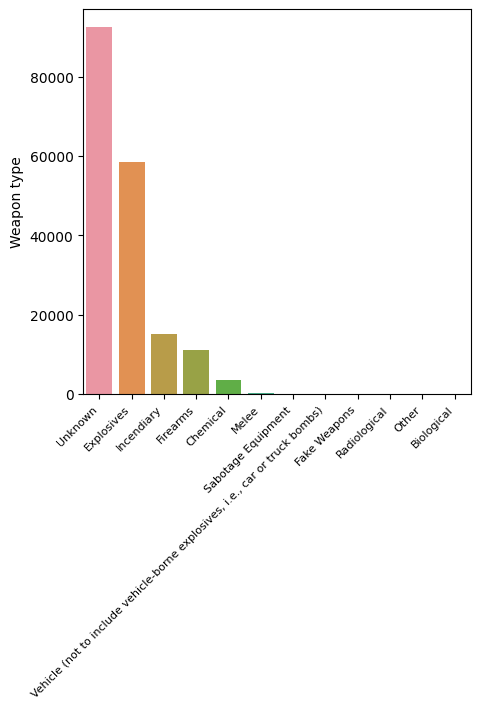

In [16]:
we=[]
[we.append(x) for x in df['Weapon type'] if x not in we]  
fig = plt.figure(figsize =(5,5))
sns.barplot(data=df, x=we, y=df['Weapon type'].value_counts(), errorbar="sd")
plt.xticks(rotation=45,horizontalalignment='right',fontsize=8) 
plt.show()

### 13) Types of attacks

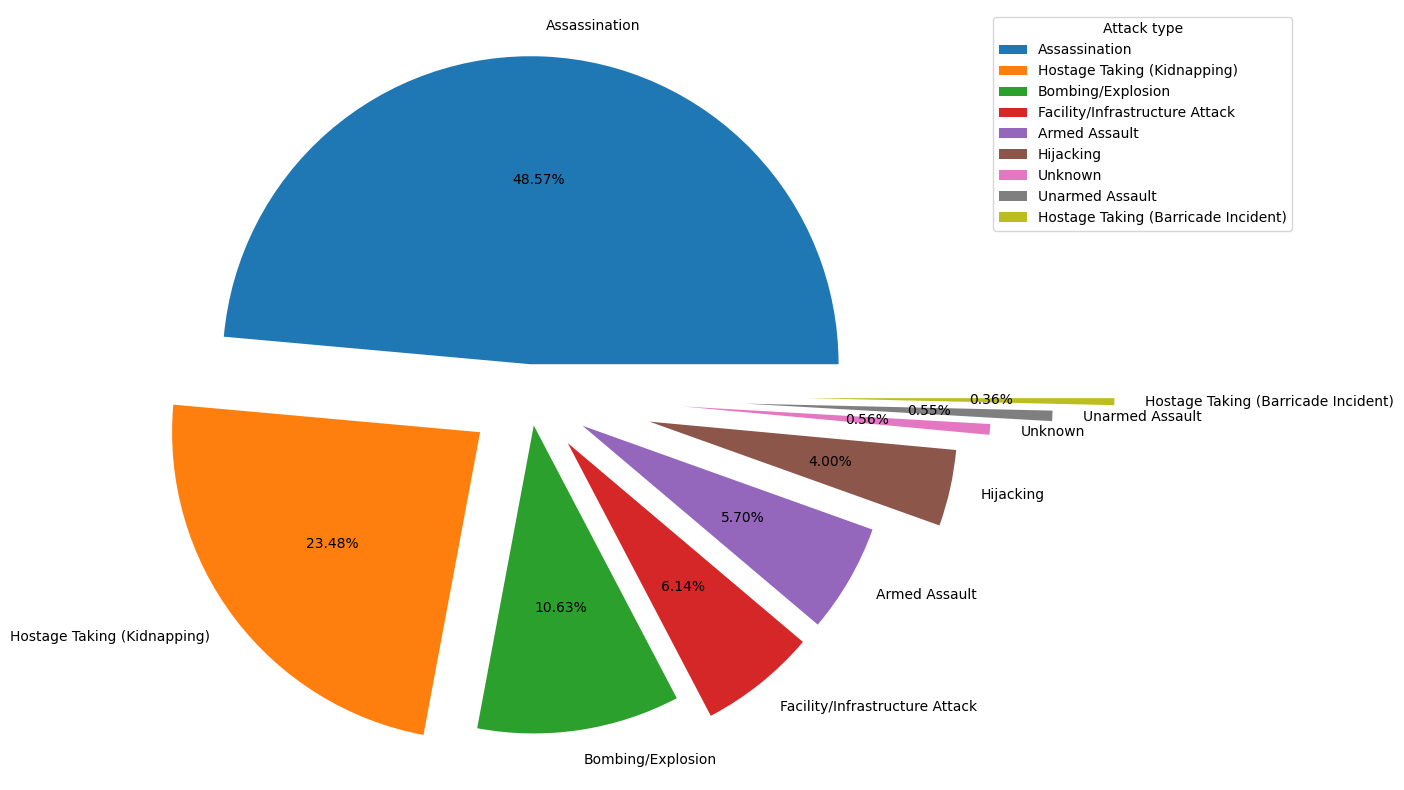

In [17]:
atk=[]
[atk.append(x) for x in df['Attack Type'] if x not in atk]
fig = plt.figure(figsize =(10,10))
explode = (0.1, 0.2, 0.1,0.2,0.2,0.4,0.5,0.7,0.9)
plt.pie(df['Attack Type'].value_counts(),labels=atk,autopct='%1.2f%%',explode=explode)
plt.legend(title ="Attack type",title_fontsize=10,loc ="best",fontsize=10,bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()

### 14) Summary

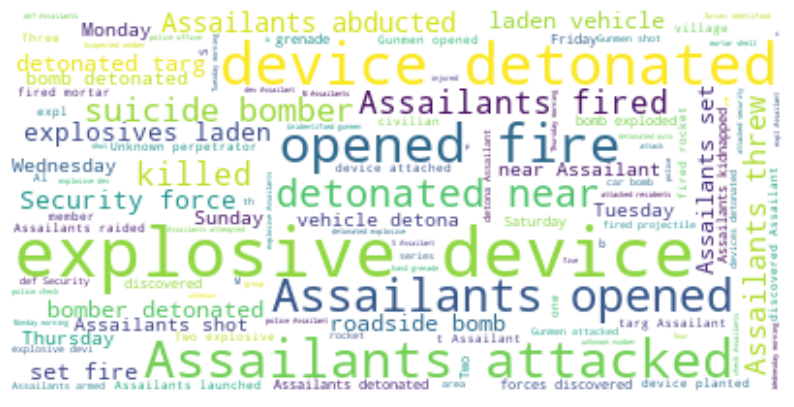

In [18]:
stop=set(STOPWORDS)
stop.add("NaN")
text = df['Summary']
text = text.to_string()
#text = re.sub(' +',' ',text)
alice_wc=WordCloud(background_color='white',max_words=2000,stopwords=stop)
alice_wc.generate(text)
fig=plt.figure(figsize=(10,14))
plt.imshow(alice_wc,interpolation='bilinear')
plt.axis('off')
plt.show()

### 15) Motive behind activities related to terrorism

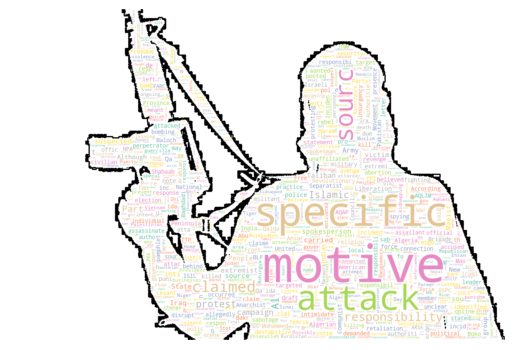

In [19]:
stop.add("NaN")
stop.add("unknown")
text1 = df['Motive']
text1 = text1.to_string()
text1 = re.sub(' +',' ',text1)
mask = np.array(Image.open("ter.jpg"))
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white', max_words=1000, mask=mask,contour_width=2,colormap='Set2',stopwords=stop).generate(text1)
plt.figure()
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0,y=0)
plt.show()

### 16) Conclusion

To conclude, we have seen various types of analysis and question and answers with the data set I found interesting. Here is something I feel worth to share. We just look at data set all we can say is that we just know what are the columns and what it contains.So Exploratory Data Analysis is a very efficient way to make our work easy. With python libraries like pandas, numpy, matplotlib, seaborn,plotly allow us to come to conclusions calculating and vizualization.

From the above analysis we conclude that

<span style="color:Green">Most attacks happen in 2014.


    

<span style="color:purple">Iraq country has the highest number of attacks.



<span style="color:olive">Middle and East Africa region has the highest number of attacks.


<span style="color:orange">Private citizens and Property were the main targets of terrorist activity.


<span style="color:blue">Bombing and Explosion methods were most commonly used in terrorist activity.


<span style="color:DarkBlue">Taliban is the most Notorious group with the highest number of terrorist activities. 

<span style="color:Brown">Baghdad city has the highest number of attacks

<span style="color:Navy">The most common type of attack was the Assassination

#### Strong security should be given for the countries Iraq,Pakistan,Afghanistan and India and also for middle East Regions and cities like Bhagdad,Karachi lima and many others.

#### Safety measures have to take regarding explosive devices as bombing explosions are the most weapons used by terrorsits

#### Strong security should be given to Private citizens and Property ,Military,Police etc as they are main target in terrorism

## <span style="color:red"><center>THANK YOU